## Assignments for Week-02

In this course, we learnt what's the search problem and what's the machine leanring. In this assignment, we need you do some more practice.

### 1. Re-code the house price machine learning

###### 1. Random Choose Method to get optimal *k* and *b*
###### 2.Supervised Direction to get optimal *k* and *b*
###### 3.Gradient Descent to get optimal *k* and *b*
###### 4. Try different Loss function and learning rate. 

For example, you can change the loss function: $Loss = \frac{1}{n} sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

And you can change the learning rate and observe the performance.

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414412237&di=8377c38d7b50c6f8d45b92ccc78dc1e7&imgtype=0&src=http%3A%2F%2Fmmbiz.qpic.cn%2Fmmbiz_jpg%2FlSyiavfm6wPgQDuDYa42IMgSkLOcPJU91RbkMibGy7VHLrhhNVLibTYk1iaLcmXKTdHc4icTDVia59QFXwqpW8cLflaw%2F640%3Fwx_fmt%3Djpeg)

In [1]:
from sklearn.datasets import load_boston

In [2]:
dataset = load_boston()

In [3]:
x, y = dataset['data'], dataset['target']

In [4]:
x_rm = x[:, 5]

In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

In [7]:
def draw_rm_price():
    plt.scatter(x_rm,y)

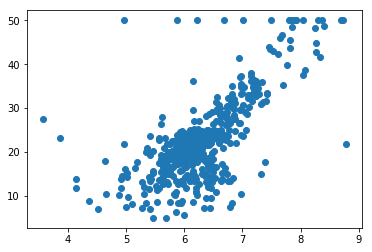

In [8]:
draw_rm_price()

$$y = k*x + b$$

$$ loss = \frac{1}{n} \sum{(y_i - {y_1i})^2}$$

In [9]:
def loss_var(y, y_get):
    return np.mean(np.square(y - y_get))

$$ loss = \frac{1}{n} \sum{|y_i- y_{1i}|} $$

In [10]:
def loss_avrange_var(y, y_get):
    return np.mean(np.abs(y - y_get))

### Random Choose Method to get k and b 

In [11]:
trying_time = 1000
min_loss = float('inf')
best_k = None
best_b = None

for i in range(trying_time):
    k = random.random()*200 - 100
    b = random.random()*200 - 100
    price_by_random_k_b = [k*i + b for i in x_rm]
    
    current_loss = loss_var(y, np.array(price_by_random_k_b))
    if current_loss < min_loss:
        best_k = k 
        best_b = b
        print('when time is :{}, k = {}, b = {}, loss = {}'.format(i, k ,b , current_loss))
        min_loss = current_loss
        

when time is :0, k = 58.35491768028663, b = 65.35153994925665, loss = 168976.60109668892
when time is :3, k = -9.319644845970359, b = -47.22091932067314, loss = 16677.92450858097
when time is :15, k = -9.658403037655702, b = -24.90721777482166, loss = 11911.171551360838
when time is :17, k = 11.741169842897307, b = -45.74622291553776, loss = 77.39133182611907
when time is :76, k = 7.277348649542262, b = -26.757599148501626, loss = 57.87863039975573
when time is :296, k = 7.863330382566929, b = -25.3928282080943, loss = 46.5842501477212


In [12]:
price_by_random_k_b = [3.3*i + 1.3 for i in x_rm]
current_loss = loss_var(y, np.array(price_by_random_k_b))
current_loss

60.43042934749012

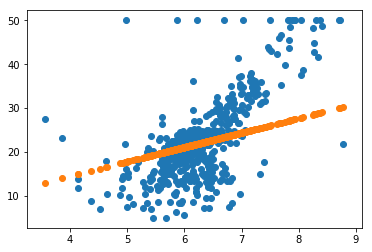

In [13]:
best_k = 3.3
best_b = 1.3
draw_rm_price()
plt.scatter(x_rm, [[best_k*i + best_b for i in x_rm]])

### Supervised Direction to get k and b

In [90]:
trying_time = 1000
min_loss = float('inf')
best_k = None
best_b = None
k = random.random()*200 - 100
b = random.random()*200 - 100
direction = [[1, 1], [1, -1], [-1, 1], [-1, -1]]
current_direction = random.choice(direction)

for i in range(trying_time):
    k += current_direction[0]
    b += current_direction[1]
    
    price_by_random_k_b = [k*i + b for i in x_rm]
    
    current_loss = loss_var(y, np.array(price_by_random_k_b))
    if current_loss < min_loss:
        best_k = k 
        best_b = b
        print('when time is :{}, k = {}, b = {}, loss = {}'.format(i, k ,b , current_loss))
        min_loss = current_loss
        
    else:
        current_direction  = random.choice([i for i in direction if i!=current_direction])

when time is :0, k = 0.5712382023143476, b = -17.45026143505821, loss = 1403.9105073966605
when time is :1, k = 1.5712382023143476, b = -16.45026143505821, loss = 918.8428153366747
when time is :2, k = 2.5712382023143476, b = -15.45026143505821, loss = 540.8923100237243
when time is :3, k = 3.5712382023143476, b = -14.45026143505821, loss = 270.05899145780967
when time is :4, k = 4.571238202314348, b = -13.45026143505821, loss = 106.3428596389305
when time is :5, k = 5.571238202314348, b = -12.45026143505821, loss = 49.74391456708693
when time is :502, k = 6.571238202314348, b = -17.45026143505821, loss = 48.48501446737231
when time is :504, k = 6.571238202314348, b = -19.45026143505821, loss = 47.2259672090701
when time is :541, k = 7.571238202314348, b = -26.45026143505821, loss = 46.71690620283192
when time is :547, k = 7.571238202314348, b = -24.45026143505821, loss = 45.11449101054125


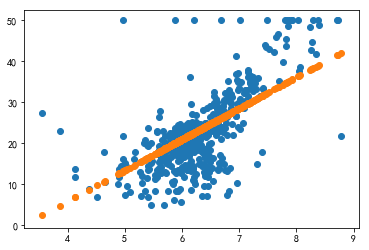

In [91]:
draw_rm_price()
plt.scatter(x_rm, [[best_k*i + best_b for i in x_rm]])

### Gradient Descent Method to get k and b

$$ loss(\theta) = \frac{1}{2n}\sum_{i = 0} ^n(h_\theta (x^i) - y^i)^2$$
¬ΩÊòØ‰∏Ä‰∏™Â∏∏ÈáèÔºåËøôÊ†∑ÊòØ‰∏∫‰∫ÜÂú®Ê±ÇÊ¢ØÂ∫¶ÁöÑÊó∂ÂÄôÔºå‰∫åÊ¨°Êñπ‰πò‰∏ãÊù•Â∞±ÂíåËøôÈáåÁöÑ¬ΩÊäµÊ∂à‰∫ÜÔºåËá™ÁÑ∂Â∞±Ê≤°ÊúâÂ§ö‰ΩôÁöÑÂ∏∏Êï∞Á≥ªÊï∞ÔºåÊñπ‰æøÂêéÁª≠ÁöÑËÆ°ÁÆóÔºåÂêåÊó∂ÂØπÁªìÊûú‰∏ç‰ºöÊúâÂΩ±Âìç


$$ÂèØ‰ª•ÁúãÂà∞ÂèòÈáèÊúâ2‰∏™,Âç≥ \theta_0 Âíå \theta_1  ÂàÜÂà´ÂØπÂ∫î‰πãÂâçÁöÑk Âíå b$$
$$h_\theta (x^i) = \theta_0* x^i + \theta_1$$

$$ \frac{\partial h(\theta)}{\partial\theta_1}=\frac1n\sum_{i=0}^n(h_\theta(x^i) - y^i)$$
$$ \frac{\partial h(\theta)}{\partial\theta_0}=\frac1n\sum_{i=0}^n(h_\theta(x^i) - y^i)x^i$$

$$Ê¢ØÂ∫¶‰∏ãÈôçÂÖ¨Âºè: \Theta^n = \Theta^{n-1} - \alpha \nabla loss $$

In [16]:
def loss_var_new(theta, x, y):
    #theta‰∏∫‰º†ÂÖ•ÁöÑÂê´kÔºåb ÁöÑÁü©Èòµ
    diff = np.dot(x, theta) - y  #h(x)  - y ÁöÑÂÄº
    return np.mean(np.square(diff))/2

In [17]:
def gradient_function(theta, x, y):
    #theta‰∏∫‰º†ÂÖ•ÁöÑÂê´kÔºåb ÁöÑÁü©Èòµ
    diff = np.dot(x, theta) - y  #h(x)  - y ÁöÑÂÄº
    return  (1.0/y.shape[0]) * np.dot(np.transpose(x), diff)

In [18]:
#Ê†ºÂºèÂåñËæìÂÖ•ÂèÇÊï∞ÔºåË∞ÉÊï¥Áü©ÈòµÔºåÊñπ‰æøÁü©ÈòµËøêÁÆó
num = x_rm.shape[0] 
X0 = np.ones((num, 1))
X = np.hstack((x_rm.reshape(num, 1), X0)) #Â¢ûÂä†‰∏Ä‰∏™Áª¥Â∫¶ÔºåÊñπ‰æøÁü©ÈòµËøêÁÆó
Y = y.reshape(y.shape[0], 1)
alpha = 0.04


def gradient_descent(X, Y, alpha):
    theta = np.array([1, 1]).reshape(2, 1) #ÂàùÂßãk bÂÄº[[1],[1]]
    gradient = gradient_function(theta, X, Y)
    while not np.all(np.abs(gradient) <= 1e-5):
        theta = theta - alpha * gradient
        gradient = gradient_function(theta, X, Y)
        #print(theta)
    return theta

In [19]:
theta = gradient_descent(X,Y,alpha)

In [20]:
theta

array([[  9.10197825],
       [-34.66978915]])

In [21]:
loss_var_new(theta, X, Y)

21.800275889845267

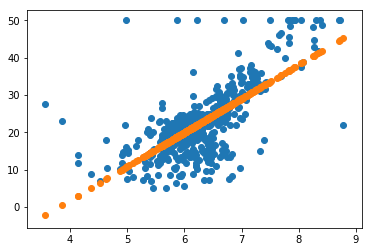

In [22]:
best_k, best_b = theta[0][0], theta[1][0]
draw_rm_price()
plt.scatter(x_rm, [[best_k*i + best_b for i in x_rm]])

## 2. Answer following questions:


###### 1. Why do we need machine learning methods instead of creating a complicated formula?


Ans: ‰∏Ä‰∏™Âõ∫ÂÆöÁöÑÂÖ¨ÂºèÈöæ‰ª•ÈöèÁùÄÊÉÖÂÜµÁöÑÊîπÂèòËÄåÂÅöÂá∫Áõ∏Â∫îÂèòÂåñÔºõËøôÊ†∑Á¨¶ÂêàË¶ÅÊ±ÇÁöÑÂºèÂ≠êÂæàÈöæË¢´ËÆæËÆ°Âá∫Êù•

###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

Ans:Ëé∑ÂæóÂ•ΩÁöÑÂèÇÊï∞ÊâÄËä±Ë¥πÁöÑÊó∂Èó¥Â§™ÈïøÔºåÂõ†‰∏∫ÈÉΩÊòØÈöèÊú∫ÁöÑ

###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

Ans:ÊñπÊ≥ïÁêÜËÆ∫‰∏äÊù•ËØ¥2‰ºò‰∫éÊñπÊ≥ï1ÔºõÊñπÊ≥ï2ÁöÑÁº∫ÁÇπÊòØÊâæÂà∞ÂØπÁöÑÊñπÂêëËä±Ë¥πÁöÑÂπ≥ÂùáÊó∂Èó¥ËæÉÈïøÔºåÂ∞§ÂÖ∂ÂèóÂà∞ÂàùÂßãÂÄºÁöÑÂΩ±ÂìçÔºåÊúâÊó∂ÂÄôÊïàÊûúËøò‰∏çÂ¶ÇÊñπÊ≥ï1

###### 4. Why do we use `Derivative / Gradient` to fit a target function? 

Ans:ÂèØ‰ª•Êõ¥Âø´Êõ¥ÂáÜÁ°ÆÂæóÊâæÂà∞ÂêàÈÄÇÁöÑKÂíåBÂÄº

###### 5. In the words 'Gredient Descent', what's the `Gredient` and what's the `Descent`?

Ans:Ê¢ØÂ∫¶ÊòØÂáΩÊï∞Âú®ËØ•ÁÇπÂ§ÑÁöÑÊñπÂêëÂØºÊï∞Ê≤øÁùÄËØ•ÊñπÂêëÂèñÂæóÊúÄÂ§ßÂÄº,ËØ•ÊúÄÂ§ßÂÄºÂ∞±ÊòØÂΩìÂâçÁÇπÁöÑÊ¢ØÂ∫¶Ôºå‰∏ãÈôçÊåáÊ≤øÁùÄËØ•ÊñπÂêëÂáΩÊï∞ÂÄº‰∏ãÈôçÁöÑÊúÄÂø´

###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

Ans:ÊñπÊ≥ï3ÁöÑ‰ºòÁÇπÂú®‰∫éÁõÆÊ†áÊÄßÂº∫Ôºå‰∏çÊñ≠Ëø≠‰ª£ÂèÇÊï∞‰ΩøÂæóËææÂà∞È¢ÑÊúüÊïàÊûúÂÄº,Âπ∂‰∏îÂèØ‰ª•ÊéßÂà∂Ê≠•ÈïøÔºåËÆæÂÆöÊúÄÂ§ßlossÂÄº

###### 7. Using the simple words to describe: What's the machine leanring.

Ans:Ê†πÊçÆÂèòÂåñË∞ÉÊï¥Ëá™Ë∫´‰ª•ËææÁõÆÁöÑ

## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

> Deadline: 2019-July-13

>Submit: Submit the source code and result to github. 



![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414356407&di=b57814aafd215bb8b8d9d8cd37c573d6&imgtype=0&src=http%3A%2F%2Fcli.clewm.net%2Ffile%2F2015%2F03%2F24%2F174ed60082b8422ac0636cfd3efb9e7f.jpg)

#### Dataflow: 

##### 1.	Get data from web page.

> a.	Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485

> b.	You may need @package **requests**[https://2.python-requests.org/en/master/] page to get the response via url

> c.	You may need save the page source to file system.

> d.	The target of this step is to get station information of all the subway lines;

> e.	You may need install @package beautiful soup[https://www.crummy.com/software/BeautifulSoup/bs4/doc/]  to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better? 

##### 2.	Preprocessing data from page source.

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> b.	the Regular Expression you may need to process the text information.

> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> e.	You may need the defaultdict, set data structures to implement this procedure. 

##### 3. Build the search agent

> Build the search agent based on the graph we build.

for example, when you run: 

```python
>>> search('Â••‰Ωì‰∏≠ÂøÉ', 'Â§©ÂÆâÈó®') 
```
you need get the result: 

Â••‰Ωì‰∏≠ÂøÉ-> A -> B -> C -> ... -> Â§©ÂÆâÈó®



### Search Problem Answer 

#### Get data from web

In [23]:
import urllib.request
import urllib.parse
import re
from bs4 import BeautifulSoup as bs

In [24]:
def url_open(url):
    req = urllib.request.Request(url)
    req.add_header('User-Agent', 'Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:67.0) Gecko/20100101 Firefox/67.0')
    response = urllib.request.urlopen(req, timeout=10)
    html = response.read().decode('utf-8')
    response.close()
    return html

In [25]:
url = 'https://baike.baidu.com/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%81/1273732?fr=aladdin'

In [26]:
def get_subway_line_url(html):
    #Ëé∑ÂèñÊâÄÊúâÂú∞ÈìÅÂÖ∑‰Ωìurl, ‰ª•listËøîÂõû
    #beautifulsoup + Ê≠£Âàô
    soup = bs(html)
    table = soup.find_all('table')[1]
    table = str(table)
    url_list = re.findall('<a data-lemmaid="\w*?" href="(.*?)" target="_blank">(\w*?)</a>', table)
    for i, item in enumerate(url_list):
        url_list[i] = list(item)
    for item in url_list:
        item[0] = 'https://baike.baidu.com' + item[0]
    return url_list

In [27]:
html = url_open(url)

In [28]:
get_subway_line_url(html)[3]

['https://baike.baidu.com/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%814%E5%8F%B7%E7%BA%BF/6310090',
 '‰∏äÊµ∑Âú∞ÈìÅ4Âè∑Á∫ø']

In [29]:
soup  = bs(url_open('https://baike.baidu.com/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%814%E5%8F%B7%E7%BA%BF/6310090'))

In [30]:
def get_station(html):
    soup = bs(html)
    table = soup.find_all('table')[0]
    station_list = []
    for item in table.find_all('tr'):
        station = re.findall('href=".*?" target="_blank">(\w*)?</a>', str(item.td))
        if not station:
            station = re.findall('valign="middle">(\w*?)</td>', str(item.td))          
        if station:
            if station[0].endswith('Á´ô'):
                station_list.append(station[0])
    return station_list

In [31]:
def get_all_line(url):
    #Ëé∑ÂèñÊâÄÊúâÂú∞ÈìÅÁ´ôÁÇπ‰ø°ÊÅØ
    html = url_open(url)
    sub_line_url = get_subway_line_url(html)
    subway_inf = []
    for subway in sub_line_url:
        html = url_open(subway[0])
        station = get_station(html)
        subway_inf.append({subway[1]: station})
        
    return subway_inf

In [32]:
html = url_open('https://baike.baidu.com/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%812%E5%8F%B7%E7%BA%BF/22947836')

In [33]:
get_station(html)

['Êµ¶‰∏úÂõΩÈôÖÊú∫Âú∫Á´ô',
 'Êµ∑Â§©‰∏âË∑ØÁ´ô',
 'Ëøú‰∏úÂ§ßÈÅìÁ´ô',
 'ÂáåÁ©∫Ë∑ØÁ´ô',
 'Â∑ùÊ≤ôÁ´ô',
 'ÂçéÂ§è‰∏úË∑ØÁ´ô',
 'ÂàõÊñ∞‰∏≠Ë∑ØÁ´ô',
 'ÂîêÈïáÁ´ô',
 'ÂπøÂÖ∞Ë∑ØÁ´ô',
 'ÈáëÁßëË∑ØÁ´ô',
 'Âº†Ê±üÈ´òÁßëÁ´ô',
 'ÈæôÈò≥Ë∑ØÁ´ô',
 '‰∏ñÁ∫™ÂÖ¨Âõ≠Á´ô',
 '‰∏äÊµ∑ÁßëÊäÄÈ¶ÜÁ´ô',
 '‰∏ñÁ∫™Â§ßÈÅìÁ´ô',
 '‰∏úÊòåË∑ØÁ´ô',
 'ÈôÜÂÆ∂Âò¥Á´ô',
 'Âçó‰∫¨‰∏úË∑ØÁ´ô',
 '‰∫∫Ê∞ëÂπøÂú∫Á´ô',
 'Âçó‰∫¨Ë•øË∑ØÁ´ô',
 'ÈùôÂÆâÂØ∫Á´ô',
 'Ê±üËãèË∑ØÁ´ô',
 '‰∏≠Â±±ÂÖ¨Âõ≠Á´ô',
 'Â®ÑÂ±±ÂÖ≥Ë∑ØÁ´ô',
 'Â®ÅÂÆÅË∑ØÁ´ô',
 'ÂåóÊñ∞Ê≥æÁ´ô',
 'Ê∑ûËôπË∑ØÁ´ô',
 'ËôπÊ°•2Âè∑Ëà™Á´ôÊ•ºÁ´ô',
 'ËôπÊ°•ÁÅ´ËΩ¶Á´ôÁ´ô',
 'ÂæêÊ≥æ‰∏úÁ´ô']

In [34]:
url = 'https://baike.baidu.com/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%81/1273732?fr=aladdin'

In [35]:
subway_inf_origin = get_all_line(url)

In [36]:
subway_inf = subway_inf_origin.copy()

In [37]:
subway_inf[9]['‰∏äÊµ∑Âú∞ÈìÅ10Âè∑Á∫ø'] = subway_inf[9]['‰∏äÊµ∑Âú∞ÈìÅ10Âè∑Á∫ø'][:3]+ ['ÈæôÊ∫™Ë∑ØÁ´ô']+ subway_inf[9]['‰∏äÊµ∑Âú∞ÈìÅ10Âè∑Á∫ø'][3:]

In [38]:
subway_inf[9]['‰∏äÊµ∑Âú∞ÈìÅ10Âè∑Á∫ø'] = list(reversed(subway_inf[9]['‰∏äÊµ∑Âú∞ÈìÅ10Âè∑Á∫ø']))
subway_inf[9]['‰∏äÊµ∑Âú∞ÈìÅ10Âè∑Á∫ø']

['Êñ∞Ê±üÊπæÂüéÁ´ô',
 'ÊÆ∑È´ò‰∏úË∑ØÁ´ô',
 '‰∏âÈó®Ë∑ØÁ´ô',
 'Ê±üÊπæ‰ΩìËÇ≤Âú∫Á´ô',
 '‰∫îËßíÂú∫Á´ô',
 'ÂõΩÊùÉË∑ØÁ´ô',
 'ÂêåÊµéÂ§ßÂ≠¶Á´ô',
 'ÂõõÂπ≥Ë∑ØÁ´ô',
 'ÈÇÆÁîµÊñ∞ÊùëÁ´ô',
 'Êµ∑‰º¶Ë∑ØÁ´ô',
 'ÂõõÂ∑ùÂåóË∑ØÁ´ô',
 'Â§©ÊΩºË∑ØÁ´ô',
 'Âçó‰∫¨‰∏úË∑ØÁ´ô',
 'Ë±´Âõ≠Á´ô',
 'ËÄÅË•øÈó®Á´ô',
 'Êñ∞Â§©Âú∞Á´ô',
 'ÈôïË•øÂçóË∑ØÁ´ô',
 '‰∏äÊµ∑Âõæ‰π¶È¶ÜÁ´ô',
 '‰∫§ÈÄöÂ§ßÂ≠¶Á´ô',
 'ËôπÊ°•Ë∑ØÁ´ô',
 'ÂÆãÂõ≠Ë∑ØÁ´ô',
 '‰ºäÁäÅË∑ØÁ´ô',
 'Ê∞¥ÂüéË∑ØÁ´ô',
 'ÈæôÊ∫™Ë∑ØÁ´ô',
 '‰∏äÊµ∑Âä®Áâ©Âõ≠Á´ô',
 'ËôπÊ°•1Âè∑Ëà™Á´ôÊ•ºÁ´ô',
 'ËôπÊ°•2Âè∑Ëà™Á´ôÊ•ºÁ´ô',
 'ËôπÊ°•ÁÅ´ËΩ¶Á´ôÁ´ô',
 'ÈæôÊ∫™Ë∑ØÁ´ô',
 'ÈæôÊüèÊñ∞ÊùëÁ´ô',
 'Á¥´Ëó§Ë∑ØÁ´ô',
 'Ëà™‰∏≠Ë∑ØÁ´ô']

#### Create net infomation

In [39]:
from collections import defaultdict
from collections import Counter

In [40]:
def create_subway_connection(stations):   
    station_connect = defaultdict(list)
    station_count = Counter(stations)
    change_point = station_count.most_common(1)[0][0] #Ëé∑ÂèñÂú∞ÈìÅÂàÜÊîØÁÇπ  
    length = len(stations)
    pre_station = None
    appear_time = 0
    for i, station in enumerate(stations):
        if i< length-1 and (stations[i+1]!= change_point or (stations[i+1]==change_point and appear_time==0)):
            next_station = stations[i+1]
        else:
            next_station = None
        if station == change_point:
            appear_time +=1
            if appear_time ==2: #change_point appear 2 times
                pre_station = None

        if pre_station != None:
            station_connect[station].append(pre_station)
        if next_station !=None:
            station_connect[station].append(next_station)
        pre_station = station   
    return station_connect

In [41]:
create_subway_connection(subway_inf[0]['‰∏äÊµ∑Âú∞ÈìÅ1Âè∑Á∫ø'])

defaultdict(list,
            {'ËéòÂ∫ÑÁ´ô': ['Â§ñÁéØË∑ØÁ´ô'],
             'Â§ñÁéØË∑ØÁ´ô': ['ËéòÂ∫ÑÁ´ô', 'Ëé≤Ëä±Ë∑ØÁ´ô'],
             'Ëé≤Ëä±Ë∑ØÁ´ô': ['Â§ñÁéØË∑ØÁ´ô', 'Èî¶Ê±ü‰πêÂõ≠Á´ô'],
             'Èî¶Ê±ü‰πêÂõ≠Á´ô': ['Ëé≤Ëä±Ë∑ØÁ´ô', '‰∏äÊµ∑ÂçóÁ´ôÁ´ô'],
             '‰∏äÊµ∑ÂçóÁ´ôÁ´ô': ['Èî¶Ê±ü‰πêÂõ≠Á´ô', 'ÊºïÂÆùË∑ØÁ´ô'],
             'ÊºïÂÆùË∑ØÁ´ô': ['‰∏äÊµ∑ÂçóÁ´ôÁ´ô', '‰∏äÊµ∑‰ΩìËÇ≤È¶ÜÁ´ô'],
             '‰∏äÊµ∑‰ΩìËÇ≤È¶ÜÁ´ô': ['ÊºïÂÆùË∑ØÁ´ô', 'ÂæêÂÆ∂Ê±áÁ´ô'],
             'ÂæêÂÆ∂Ê±áÁ´ô': ['‰∏äÊµ∑‰ΩìËÇ≤È¶ÜÁ´ô', 'Ë°°Â±±Ë∑ØÁ´ô'],
             'Ë°°Â±±Ë∑ØÁ´ô': ['ÂæêÂÆ∂Ê±áÁ´ô', 'Â∏∏ÁÜüË∑ØÁ´ô'],
             'Â∏∏ÁÜüË∑ØÁ´ô': ['Ë°°Â±±Ë∑ØÁ´ô', 'ÈôïË•øÂçóË∑ØÁ´ô'],
             'ÈôïË•øÂçóË∑ØÁ´ô': ['Â∏∏ÁÜüË∑ØÁ´ô', 'ÈªÑÈôÇÂçóË∑ØÁ´ô'],
             'ÈªÑÈôÇÂçóË∑ØÁ´ô': ['ÈôïË•øÂçóË∑ØÁ´ô', '‰∫∫Ê∞ëÂπøÂú∫Á´ô'],
             '‰∫∫Ê∞ëÂπøÂú∫Á´ô': ['ÈªÑÈôÇÂçóË∑ØÁ´ô', 'Êñ∞Èó∏Ë∑ØÁ´ô'],
             'Êñ∞Èó∏Ë∑ØÁ´ô': ['‰∫∫Ê∞ëÂπøÂú∫Á´ô', 'Ê±â‰∏≠Ë∑ØÁ´ô'],
             'Ê±â‰∏≠Ë∑ØÁ´ô': ['Êñ∞Èó∏Ë∑ØÁ´ô', '‰∏äÊµ∑ÁÅ´ËΩ¶

In [42]:
stations_connection_all = defaultdict(list)

In [43]:
stations_connection_list = []
subway_name = []
for items in subway_inf:
    for key in items:
        connection  = create_subway_connection(items[key])
        subway_name.append(key)
        stations_connection_list.append(connection)

In [44]:
stations_tag = defaultdict(list)
for i, station in enumerate(stations_connection_list):
    for key, items in station.items():
        if key not in stations_connection_all:
            stations_connection_all[key] = items
        else:
            stations_connection_all[key] += items
        if key in stations_tag: #ÁªüËÆ°Á´ôÁÇπÂΩíÂ±û
            stations_tag[key] += [subway_name[i]]
        else:
            stations_tag[key] = [subway_name[i]]

In [45]:
#stations_connection_all

In [46]:
#stations_tag

In [47]:
import networkx as nx
import matplotlib.pyplot as plt

In [48]:
%matplotlib inline

In [49]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

D:\Design Software\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


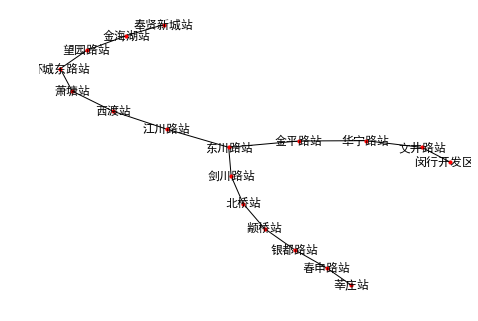

In [50]:
nx.draw(nx.Graph(create_subway_connection(subway_inf[4]['‰∏äÊµ∑Âú∞ÈìÅ5Âè∑Á∫ø'])), with_labels=True, node_size=10)

#### Build Search agent

In [51]:
def search(start, destination, connection_grpah, sort_candidate, by_the_way =[]):
    #ÈªòËÆ§ÁÆóÊ≥ï‰∏ÄÂÆöË¶ÅÊòØÂπøÂ∫¶‰ºòÂÖàÔºåËøôÊ†∑sort_candidateÁöÑÁ≠ñÁï•ÊâçËÉΩÊúâÊïàÂèëÊå•ÔºåÈªòËÆ§ÊòØÊ∑±Â∫¶‰ºòÂÖàÁöÑËØùÂÆπÊòì‰∏ÄÊù°Ë∑ØËµ∞Âà∞ÈªëÔºå
    #ÊéíÂ∫èÁÆóÊ≥ïÂèëÊå•‰∏ç‰∫Ü‰ΩúÁî®ÔºåÂèçËÄåËµ∑Âà∞ÂèçÊïàÊûú
    pathes = [[start]]  #ÊØèËµ∞‰∏ÄÊ≠•ÈÉΩÊ∑ªÂä†‰∏Ä‰∏™Êñ∞ÁöÑË∑ØÂæÑ
    
    visitied = set()
    
    while pathes: # if we find existing pathes
        path = pathes.pop(0)   #Ëé∑ÂèñÂΩìÂâçË¶ÅËÆøÈóÆÁöÑË∑ØÂæÑ, ÊéßÂà∂Ê∑±Â∫¶ ÂπøÂ∫¶path = pathes.pop()ÂàôÂèòÊàêÊ∑±Â∫¶‰ºòÂÖà 
        froninter = path[-1]   #Ëé∑ÂèñÂΩìÂâçËææÂà∞ÁöÑËäÇÁÇπ
        
        if froninter in visitied: continue
            
        successors = connection_grpah[froninter]  #Ëé∑ÂèñÂΩìÂâçËäÇÁÇπÁöÑÊâÄÊúâËøûÊé•ËäÇÁÇπ
        #print('ÂΩìÂâçËÆøÈóÆËäÇÁÇπÔºö', froninter)
       # print('ÂΩìÂâçËäÇÁÇπÈÇªÊé•ËäÇÁÇπ: ', successors)
        for city in successors:
            if city in path: continue  # eliminate loop Èò≤Ê≠¢ÁéØÂΩ¢,‰πüÈò≤Ê≠¢ÈáçÂ§çËÆøÈóÆ,Âíåcity in visitiedÊúâÂêåÊ†∑ÊïàÊûú
                
            new_path = path + [city]
            
            pathes.append(new_path)
            
            if city == destination: return new_path
        
        visitied.add(froninter)
        
        if by_the_way==[]:          
            pathes = sort_candidate(pathes) # ÊêúÁ¥¢Á≠ñÁï•ÊéßÂà∂
        else:
            pathes = sort_candidate(pathes, by_the_way)
        #print('sorted', pathes , '\n')

In [52]:
def transfer_stations_first(pathes): 
    return sorted(pathes, key=len)

In [53]:
def transfer_as_much_possible(pathes):
    return sorted(pathes, key=len, reverse=True)

In [54]:
def pretty_print(station):
    print(len(station))
    print('üöó->'.join(station))

In [55]:
pretty_print(search('ÁéØÂüé‰∏úË∑ØÁ´ô', '‰∫∫Ê∞ëÂπøÂú∫Á´ô', stations_connection_all, sort_candidate=transfer_stations_first))

23
ÁéØÂüé‰∏úË∑ØÁ´ôüöó->ËêßÂ°òÁ´ôüöó->Ë•øÊ∏°Á´ôüöó->Ê±üÂ∑ùË∑ØÁ´ôüöó->‰∏úÂ∑ùË∑ØÁ´ôüöó->ÂâëÂ∑ùË∑ØÁ´ôüöó->ÂåóÊ°•Á´ôüöó->È¢õÊ°•Á´ôüöó->Èì∂ÈÉΩË∑ØÁ´ôüöó->Êò•Áî≥Ë∑ØÁ´ôüöó->ËéòÂ∫ÑÁ´ôüöó->Â§ñÁéØË∑ØÁ´ôüöó->Ëé≤Ëä±Ë∑ØÁ´ôüöó->Èî¶Ê±ü‰πêÂõ≠Á´ôüöó->‰∏äÊµ∑ÂçóÁ´ôÁ´ôüöó->ÊºïÂÆùË∑ØÁ´ôüöó->‰∏äÊµ∑‰ΩìËÇ≤È¶ÜÁ´ôüöó->ÂæêÂÆ∂Ê±áÁ´ôüöó->Ë°°Â±±Ë∑ØÁ´ôüöó->Â∏∏ÁÜüË∑ØÁ´ôüöó->ÈôïË•øÂçóË∑ØÁ´ôüöó->ÈªÑÈôÇÂçóË∑ØÁ´ôüöó->‰∫∫Ê∞ëÂπøÂú∫Á´ô


In [56]:
ss = search('ÁéØÂüé‰∏úË∑ØÁ´ô', '‰∫∫Ê∞ëÂπøÂú∫Á´ô', stations_connection_all, sort_candidate=transfer_stations_first)
ss

['ÁéØÂüé‰∏úË∑ØÁ´ô',
 'ËêßÂ°òÁ´ô',
 'Ë•øÊ∏°Á´ô',
 'Ê±üÂ∑ùË∑ØÁ´ô',
 '‰∏úÂ∑ùË∑ØÁ´ô',
 'ÂâëÂ∑ùË∑ØÁ´ô',
 'ÂåóÊ°•Á´ô',
 'È¢õÊ°•Á´ô',
 'Èì∂ÈÉΩË∑ØÁ´ô',
 'Êò•Áî≥Ë∑ØÁ´ô',
 'ËéòÂ∫ÑÁ´ô',
 'Â§ñÁéØË∑ØÁ´ô',
 'Ëé≤Ëä±Ë∑ØÁ´ô',
 'Èî¶Ê±ü‰πêÂõ≠Á´ô',
 '‰∏äÊµ∑ÂçóÁ´ôÁ´ô',
 'ÊºïÂÆùË∑ØÁ´ô',
 '‰∏äÊµ∑‰ΩìËÇ≤È¶ÜÁ´ô',
 'ÂæêÂÆ∂Ê±áÁ´ô',
 'Ë°°Â±±Ë∑ØÁ´ô',
 'Â∏∏ÁÜüË∑ØÁ´ô',
 'ÈôïË•øÂçóË∑ØÁ´ô',
 'ÈªÑÈôÇÂçóË∑ØÁ´ô',
 '‰∫∫Ê∞ëÂπøÂú∫Á´ô']

# ÔºàOptionalÔºâCreate different policies for transfer system.


In [57]:
def Sortest_Path_first(pathes):
    return sorted(pathes, key=len)

In [58]:
#ËÆ°ÁÆóÊç¢‰πò‰ø°ÊÅØ
def tansfer_calcu(path):
    transfer = []
    previous = None #‰∏ä‰∏Ä‰∏™Á´ôÁöÑÊ†áËØÜ
    pre_line = None
    current_line = None  #ÂΩìÂâçÂú∞ÈìÅÂè∑
    pre_station  = None
    current_flag = -1
    for _a, station in enumerate(path):
        if previous:
            current_line = [x for x in previous if x in stations_tag[station]][0] #Ëé∑Âèñ‰∏§Á´ôÊ†áËØÜÁöÑ‰∫§ÈõÜ
           # print(current_line)
            if current_line!= pre_line:
                transfer.append([current_line,[pre_station]])
                current_flag += 1
                pre_line = current_line
            transfer[current_flag][1]  +=  [station]          
            
        previous = stations_tag[station]
        pre_station = station
        
    return transfer 

In [59]:
nn = ['22',[]]

In [60]:
stations_tag['‰∏äÊµ∑‰ΩìËÇ≤Âú∫Á´ô']

['‰∏äÊµ∑Âú∞ÈìÅ4Âè∑Á∫ø']

In [61]:
def Minimum_Transfer_Priority(pathes):  
    '''1. ËØ•ÁÆóÊ≥ïÂèØËÉΩ‰ºö‰ΩøÂæóÊúÄÂ∞èÊ¨°Êï∞Êç¢‰πòÊ¨°Êï∞‰∏éÂÆûÈôÖ‰∏çÁ¨¶Ôºå
    Âõ†‰∏∫ÊúÄÂêé‰∏Ä‰∏™Á´ôÂ¶ÇÊûúÊàêÂäü‰ºöÁõ¥Êé•ÊêúÁ¥¢ÂáΩÊï∞‰ºöÁõ¥Êé•ËøîÂõû,
    Â¶ÇÊûúÊúÄÂêéËøô‰∏™Á´ôÊç¢‰πò‰∫ÜÔºåÈÇ£‰πàÂØºËá¥Êç¢‰πòÊ¨°Êï∞+1,Â¶Ç‰ΩïËß£ÂÜ≥ËØ•ÈóÆÈ¢òÔºü
    2. ËØ•ÁÆóÊ≥ïÂú®‰∏ÄÂÆöÁ®ãÂ∫¶‰∏äÂèòÊàêÊù•Ê∑±Â∫¶‰ºòÂÖàÁÆóÊ≥ïÔºÅ‰∏ÄÊù°ÈÅìËµ∞Âà∞ÈªëÔºåÊâÄ‰ª•
    Êç¢‰πòÊï∞ÈáèÂ∞ëÔºåÂØºËá¥ÂÆûÈôÖÊïàÊûúÂπ∂‰∏çÁêÜÊÉ≥'''
    if len(pathes) <= 1: return pathes
    
    def tansfer_calcu(path):
        transfer = [] 
        previous = None #‰∏ä‰∏Ä‰∏™Á´ôÁöÑÊ†áËØÜ
        previous_line = None #‰∏ä‰∏Ä‰∏™Âú∞ÈìÅÂè∑
        current_line = None 
        for i in path:
            if previous:
                current_line = [x for x in previous if x in stations_tag[i]][0] #Ëé∑Âèñ‰∏§Á´ôÊ†áËØÜÁöÑ‰∫§ÈõÜ                 
            if previous_line != current_line:
                transfer.append(current_line)
                previous_line = current_line
            previous = stations_tag[i]            
        return len(transfer)  
    
    return sorted(pathes, key=tansfer_calcu)

In [62]:
def tansfer_calcu_test(path):
    transfer = [] 
    previous = None #‰∏ä‰∏Ä‰∏™Á´ôÁöÑÊ†áËØÜ
    previous_line = None #‰∏ä‰∏Ä‰∏™Âú∞ÈìÅÂè∑
    current_line = None 
    for i in path:
        if previous:
            current_line = [x for x in previous if x in stations_tag[i]][0] #Ëé∑Âèñ‰∏§Á´ôÊ†áËØÜÁöÑ‰∫§ÈõÜ                 
        if previous_line != current_line:
            transfer.append(current_line)
            previous_line = current_line
        previous = stations_tag[i]            
    return len(transfer)  

In [63]:
def pretty_print_improve(station):
    print(len(station))
    tansfer_info = tansfer_calcu(station)
    for i in tansfer_info:
        print(i[0][4:]+':','üöó->'.join(i[1]))

In [64]:
ss = search('ÁéØÂüé‰∏úË∑ØÁ´ô', 'ÈôÜÂÆ∂ÊµúË∑ØÁ´ô', stations_connection_all, sort_candidate= Minimum_Transfer_Priority)

In [65]:
tansfer_calcu_test(ss)

4

In [66]:
ssss  = search('ÁéØÂüé‰∏úË∑ØÁ´ô', '‰∫∫Ê∞ëÂπøÂú∫Á´ô', stations_connection_all, sort_candidate=Minimum_Transfer_Priority)

In [67]:
pretty_print_improve(search('ÁéØÂüé‰∏úË∑ØÁ´ô', '‰∫∫Ê∞ëÂπøÂú∫Á´ô', stations_connection_all, sort_candidate=Minimum_Transfer_Priority))

23
5Âè∑Á∫ø: ÁéØÂüé‰∏úË∑ØÁ´ôüöó->ËêßÂ°òÁ´ôüöó->Ë•øÊ∏°Á´ôüöó->Ê±üÂ∑ùË∑ØÁ´ôüöó->‰∏úÂ∑ùË∑ØÁ´ôüöó->ÂâëÂ∑ùË∑ØÁ´ôüöó->ÂåóÊ°•Á´ôüöó->È¢õÊ°•Á´ôüöó->Èì∂ÈÉΩË∑ØÁ´ôüöó->Êò•Áî≥Ë∑ØÁ´ôüöó->ËéòÂ∫ÑÁ´ô
1Âè∑Á∫ø: ËéòÂ∫ÑÁ´ôüöó->Â§ñÁéØË∑ØÁ´ôüöó->Ëé≤Ëä±Ë∑ØÁ´ôüöó->Èî¶Ê±ü‰πêÂõ≠Á´ôüöó->‰∏äÊµ∑ÂçóÁ´ôÁ´ôüöó->ÊºïÂÆùË∑ØÁ´ôüöó->‰∏äÊµ∑‰ΩìËÇ≤È¶ÜÁ´ôüöó->ÂæêÂÆ∂Ê±áÁ´ôüöó->Ë°°Â±±Ë∑ØÁ´ôüöó->Â∏∏ÁÜüË∑ØÁ´ôüöó->ÈôïË•øÂçóË∑ØÁ´ôüöó->ÈªÑÈôÇÂçóË∑ØÁ´ôüöó->‰∫∫Ê∞ëÂπøÂú∫Á´ô


In [68]:
#stations_tag

In [69]:
def Comprehensive_Priority(pathes):
    #ÂèñË∑ØÂæÑÁü≠ÁöÑÂâç‰∏§‰Ωç ËøõË°åÊç¢‰πòÊ¨°Êï∞ÊéíÂ∫è
    new_pathes = Sortest_Path_first(pathes)
    if len(new_pathes)> 2:
        final_pathes = Minimum_Transfer_Priority(new_pathes[:2])+ new_pathes[2:]
    return final_pathes

In [70]:
def By_the_Way(pathes, by_the_way):
    '''Êúâ‰∏ÄÂÆöÂ±ÄÈôêÊÄßÔºåÂΩìÈÅçÂéÜÂà∞ÁõÆÊ†áËäÇÁÇπÔºåËÄåÂè¶‰∏ÄÊù°Ë∑ØÁ∫øËøò‰∏∫Âà∞Ëææby_the_wayÁöÑÁÇπ
    Êó∂Ôºå‰ºöÂá∫Áé∞‰∏çÂêåby_the_wayÁöÑÁÇπÁöÑÊÉÖÂÜµ
    '''   
    if len(pathes) <= 1: return pathes
    
    fit_status = []
    for path in pathes:
        fit = [i for i in path if i in by_the_way]
        #print(fit)
        fit_status.append(len(fit))
    new_pathes_array = list(zip(pathes,fit_status))
    new_pathes_array = sorted(new_pathes_array, key=lambda x:x[1], reverse=True)
    new_pathes = list(list(zip(*new_pathes_array))[0])
    return new_pathes

In [71]:
ss = [1,3,4,5,5]
ss.reverse()

In [72]:
ss = search('ÁéØÂüé‰∏úË∑ØÁ´ô', 'ÈôÜÂÆ∂ÊµúË∑ØÁ´ô', stations_connection_all, sort_candidate= Minimum_Transfer_Priority)

In [73]:
tt = search('ÁéØÂüé‰∏úË∑ØÁ´ô', '‰∫∫Ê∞ëÂπøÂú∫Á´ô', stations_connection_all, sort_candidate=By_the_Way,by_the_way=['‰∏äÊµ∑‰ΩìËÇ≤Âú∫Á´ô'])

In [74]:
tt

['ÁéØÂüé‰∏úË∑ØÁ´ô',
 'ËêßÂ°òÁ´ô',
 'Ë•øÊ∏°Á´ô',
 'Ê±üÂ∑ùË∑ØÁ´ô',
 '‰∏úÂ∑ùË∑ØÁ´ô',
 'ÂâëÂ∑ùË∑ØÁ´ô',
 'ÂåóÊ°•Á´ô',
 'È¢õÊ°•Á´ô',
 'Èì∂ÈÉΩË∑ØÁ´ô',
 'Êò•Áî≥Ë∑ØÁ´ô',
 'ËéòÂ∫ÑÁ´ô',
 'Â§ñÁéØË∑ØÁ´ô',
 'Ëé≤Ëä±Ë∑ØÁ´ô',
 'Èî¶Ê±ü‰πêÂõ≠Á´ô',
 '‰∏äÊµ∑ÂçóÁ´ôÁ´ô',
 'ÊºïÂÆùË∑ØÁ´ô',
 '‰∏äÊµ∑‰ΩìËÇ≤È¶ÜÁ´ô',
 '‰∏äÊµ∑‰ΩìËÇ≤Âú∫Á´ô',
 '‰∏úÂÆâË∑ØÁ´ô',
 'Â§ßÊú®Ê°•Ë∑ØÁ´ô',
 'ÂòâÂñÑË∑ØÁ´ô',
 'ÈôïË•øÂçóË∑ØÁ´ô',
 'ÈªÑÈôÇÂçóË∑ØÁ´ô',
 '‰∫∫Ê∞ëÂπøÂú∫Á´ô']

In [75]:
tansfer_calcu(tt)

[['‰∏äÊµ∑Âú∞ÈìÅ5Âè∑Á∫ø',
  ['ÁéØÂüé‰∏úË∑ØÁ´ô',
   'ËêßÂ°òÁ´ô',
   'Ë•øÊ∏°Á´ô',
   'Ê±üÂ∑ùË∑ØÁ´ô',
   '‰∏úÂ∑ùË∑ØÁ´ô',
   'ÂâëÂ∑ùË∑ØÁ´ô',
   'ÂåóÊ°•Á´ô',
   'È¢õÊ°•Á´ô',
   'Èì∂ÈÉΩË∑ØÁ´ô',
   'Êò•Áî≥Ë∑ØÁ´ô',
   'ËéòÂ∫ÑÁ´ô']],
 ['‰∏äÊµ∑Âú∞ÈìÅ1Âè∑Á∫ø', ['ËéòÂ∫ÑÁ´ô', 'Â§ñÁéØË∑ØÁ´ô', 'Ëé≤Ëä±Ë∑ØÁ´ô', 'Èî¶Ê±ü‰πêÂõ≠Á´ô', '‰∏äÊµ∑ÂçóÁ´ôÁ´ô', 'ÊºïÂÆùË∑ØÁ´ô', '‰∏äÊµ∑‰ΩìËÇ≤È¶ÜÁ´ô']],
 ['‰∏äÊµ∑Âú∞ÈìÅ4Âè∑Á∫ø', ['‰∏äÊµ∑‰ΩìËÇ≤È¶ÜÁ´ô', '‰∏äÊµ∑‰ΩìËÇ≤Âú∫Á´ô', '‰∏úÂÆâË∑ØÁ´ô', 'Â§ßÊú®Ê°•Ë∑ØÁ´ô']],
 ['‰∏äÊµ∑Âú∞ÈìÅ12Âè∑Á∫ø', ['Â§ßÊú®Ê°•Ë∑ØÁ´ô', 'ÂòâÂñÑË∑ØÁ´ô', 'ÈôïË•øÂçóË∑ØÁ´ô']],
 ['‰∏äÊµ∑Âú∞ÈìÅ1Âè∑Á∫ø', ['ÈôïË•øÂçóË∑ØÁ´ô', 'ÈªÑÈôÇÂçóË∑ØÁ´ô', '‰∫∫Ê∞ëÂπøÂú∫Á´ô']]]

In [76]:
pretty_print_improve(search('ÁéØÂüé‰∏úË∑ØÁ´ô', '‰∫∫Ê∞ëÂπøÂú∫Á´ô', stations_connection_all, sort_candidate=By_the_Way,by_the_way=['‰∏úÂÆâË∑ØÁ´ô','È©¨ÂΩìË∑ØÁ´ô']))

27
5Âè∑Á∫ø: ÁéØÂüé‰∏úË∑ØÁ´ôüöó->ËêßÂ°òÁ´ôüöó->Ë•øÊ∏°Á´ôüöó->Ê±üÂ∑ùË∑ØÁ´ôüöó->‰∏úÂ∑ùË∑ØÁ´ôüöó->ÂâëÂ∑ùË∑ØÁ´ôüöó->ÂåóÊ°•Á´ôüöó->È¢õÊ°•Á´ôüöó->Èì∂ÈÉΩË∑ØÁ´ôüöó->Êò•Áî≥Ë∑ØÁ´ôüöó->ËéòÂ∫ÑÁ´ô
1Âè∑Á∫ø: ËéòÂ∫ÑÁ´ôüöó->Â§ñÁéØË∑ØÁ´ôüöó->Ëé≤Ëä±Ë∑ØÁ´ôüöó->Èî¶Ê±ü‰πêÂõ≠Á´ôüöó->‰∏äÊµ∑ÂçóÁ´ôÁ´ôüöó->ÊºïÂÆùË∑ØÁ´ôüöó->‰∏äÊµ∑‰ΩìËÇ≤È¶ÜÁ´ô
4Âè∑Á∫ø: ‰∏äÊµ∑‰ΩìËÇ≤È¶ÜÁ´ôüöó->‰∏äÊµ∑‰ΩìËÇ≤Âú∫Á´ôüöó->‰∏úÂÆâË∑ØÁ´ôüöó->Â§ßÊú®Ê°•Ë∑ØÁ´ô
12Âè∑Á∫ø: Â§ßÊú®Ê°•Ë∑ØÁ´ôüöó->ÂòâÂñÑË∑ØÁ´ô
9Âè∑Á∫ø: ÂòâÂñÑË∑ØÁ´ôüöó->ÊâìÊµ¶Ê°•Á´ôüöó->È©¨ÂΩìË∑ØÁ´ôüöó->ÈôÜÂÆ∂ÊµúË∑ØÁ´ô
8Âè∑Á∫ø: ÈôÜÂÆ∂ÊµúË∑ØÁ´ôüöó->ËÄÅË•øÈó®Á´ôüöó->Â§ß‰∏ñÁïåÁ´ôüöó->‰∫∫Ê∞ëÂπøÂú∫Á´ô


In [77]:
pretty_print_improve(search('ÁéØÂüé‰∏úË∑ØÁ´ô', '‰∫∫Ê∞ëÂπøÂú∫Á´ô', stations_connection_all, sort_candidate=Sortest_Path_first))

23
5Âè∑Á∫ø: ÁéØÂüé‰∏úË∑ØÁ´ôüöó->ËêßÂ°òÁ´ôüöó->Ë•øÊ∏°Á´ôüöó->Ê±üÂ∑ùË∑ØÁ´ôüöó->‰∏úÂ∑ùË∑ØÁ´ôüöó->ÂâëÂ∑ùË∑ØÁ´ôüöó->ÂåóÊ°•Á´ôüöó->È¢õÊ°•Á´ôüöó->Èì∂ÈÉΩË∑ØÁ´ôüöó->Êò•Áî≥Ë∑ØÁ´ôüöó->ËéòÂ∫ÑÁ´ô
1Âè∑Á∫ø: ËéòÂ∫ÑÁ´ôüöó->Â§ñÁéØË∑ØÁ´ôüöó->Ëé≤Ëä±Ë∑ØÁ´ôüöó->Èî¶Ê±ü‰πêÂõ≠Á´ôüöó->‰∏äÊµ∑ÂçóÁ´ôÁ´ôüöó->ÊºïÂÆùË∑ØÁ´ôüöó->‰∏äÊµ∑‰ΩìËÇ≤È¶ÜÁ´ôüöó->ÂæêÂÆ∂Ê±áÁ´ôüöó->Ë°°Â±±Ë∑ØÁ´ôüöó->Â∏∏ÁÜüË∑ØÁ´ôüöó->ÈôïË•øÂçóË∑ØÁ´ôüöó->ÈªÑÈôÇÂçóË∑ØÁ´ôüöó->‰∫∫Ê∞ëÂπøÂú∫Á´ô


‰ª•‰∏ãÊÉÖÂÜµÂéüÂõ†ÂàÜÊûê,Âõ†‰∏∫Âú®ÂæêÂÆ∂Ê±áÁ´ôÁöÑÊó∂ÂÄôSortest_Path_firstÊç¢‰πò‰∫Ü,ÊïÖMinimum_Transfer_PriorityÁÆóÊ≥ïÊ†πÊçÆÊéíÂ∫èÁªìÊûú‰ºöÈÄâÊã©Êñ∞Ë∑ØÁ∫ø,‰ΩÜÊòØ

Êñ∞Ë∑ØÁ∫øËµ∞Âà∞**ÈôïË•øÂçóË∑ØÁ´ô**Êó∂ÂÄôËøõË°åÊéíÂ∫èÁöÑÊó∂ÂÄô(Ê≠§Êó∂1Âè∑Á∫øÂ∑≤ÁªèËµ∞Âà∞Â§¥Ëµ∞ÂÆå‰∫Ü,Áé∞Âú®ÊòØËøîÂõûÂà∞ÂéüÊù•ÁöÑÁÇπ)Âíå ÂéüÊù•ÂæêÂÆ∂Ê±áÁ´ôÁöÑÈÇ£Êù°Ë∑ØÁ∫øÂ§Ñ‰∫éÂêåÁ≠â‰ºòÂÖàÁ∫ßÂà´, ‰ΩÜÂæêÂÆ∂Ê±áÁ´ôÁöÑÈÇ£Êù°Ë∑ØÁ∫øÂ∑≤ÁªèË¢´ÊéíÂà∞ÂêéÈù¢Êù•,ÊâÄ‰ª•

ÁªßÁª≠Ê≤øÁùÄ**ÈôïË•øÂçóË∑ØÁ´ô**ÂΩìËµ∞Âà∞**ËÄÅË•øÈó®**Á´ôÊó∂ÂÄôÂæÄ‰∏ãËµ∞ ,ËøòÊ≤°Êù•ÂæóÂèäÊéíÂ∫èÂ∞±ÊâæÂà∞‰∫ÜÁªàÁÇπÁ´ô,Áõ¥Êé•ËøîÂõû‰∫Ü„ÄÇÂ¶Ç‰ΩïËß£ÂÜ≥ËØ•ÈóÆÈ¢òÔºüÔºü

In [78]:
pretty_print_improve(search('ÁéØÂüé‰∏úË∑ØÁ´ô', 'ÈôÜÂÆ∂ÊµúË∑ØÁ´ô', stations_connection_all, sort_candidate=Sortest_Path_first))

23
5Âè∑Á∫ø: ÁéØÂüé‰∏úË∑ØÁ´ôüöó->ËêßÂ°òÁ´ôüöó->Ë•øÊ∏°Á´ôüöó->Ê±üÂ∑ùË∑ØÁ´ôüöó->‰∏úÂ∑ùË∑ØÁ´ôüöó->ÂâëÂ∑ùË∑ØÁ´ôüöó->ÂåóÊ°•Á´ôüöó->È¢õÊ°•Á´ôüöó->Èì∂ÈÉΩË∑ØÁ´ôüöó->Êò•Áî≥Ë∑ØÁ´ôüöó->ËéòÂ∫ÑÁ´ô
1Âè∑Á∫ø: ËéòÂ∫ÑÁ´ôüöó->Â§ñÁéØË∑ØÁ´ôüöó->Ëé≤Ëä±Ë∑ØÁ´ôüöó->Èî¶Ê±ü‰πêÂõ≠Á´ôüöó->‰∏äÊµ∑ÂçóÁ´ôÁ´ôüöó->ÊºïÂÆùË∑ØÁ´ôüöó->‰∏äÊµ∑‰ΩìËÇ≤È¶ÜÁ´ôüöó->ÂæêÂÆ∂Ê±áÁ´ô
9Âè∑Á∫ø: ÂæêÂÆ∂Ê±áÁ´ôüöó->ËÇáÂòâÊµúË∑ØÁ´ôüöó->ÂòâÂñÑË∑ØÁ´ôüöó->ÊâìÊµ¶Ê°•Á´ôüöó->È©¨ÂΩìË∑ØÁ´ôüöó->ÈôÜÂÆ∂ÊµúË∑ØÁ´ô


In [79]:
pretty_print_improve(search('ÁéØÂüé‰∏úË∑ØÁ´ô', 'ÈôÜÂÆ∂ÊµúË∑ØÁ´ô', stations_connection_all, sort_candidate= Minimum_Transfer_Priority))

24
5Âè∑Á∫ø: ÁéØÂüé‰∏úË∑ØÁ´ôüöó->ËêßÂ°òÁ´ôüöó->Ë•øÊ∏°Á´ôüöó->Ê±üÂ∑ùË∑ØÁ´ôüöó->‰∏úÂ∑ùË∑ØÁ´ôüöó->ÂâëÂ∑ùË∑ØÁ´ôüöó->ÂåóÊ°•Á´ôüöó->È¢õÊ°•Á´ôüöó->Èì∂ÈÉΩË∑ØÁ´ôüöó->Êò•Áî≥Ë∑ØÁ´ôüöó->ËéòÂ∫ÑÁ´ô
1Âè∑Á∫ø: ËéòÂ∫ÑÁ´ôüöó->Â§ñÁéØË∑ØÁ´ôüöó->Ëé≤Ëä±Ë∑ØÁ´ôüöó->Èî¶Ê±ü‰πêÂõ≠Á´ôüöó->‰∏äÊµ∑ÂçóÁ´ôÁ´ôüöó->ÊºïÂÆùË∑ØÁ´ôüöó->‰∏äÊµ∑‰ΩìËÇ≤È¶ÜÁ´ôüöó->ÂæêÂÆ∂Ê±áÁ´ôüöó->Ë°°Â±±Ë∑ØÁ´ôüöó->Â∏∏ÁÜüË∑ØÁ´ôüöó->ÈôïË•øÂçóË∑ØÁ´ô
10Âè∑Á∫ø: ÈôïË•øÂçóË∑ØÁ´ôüöó->Êñ∞Â§©Âú∞Á´ôüöó->ËÄÅË•øÈó®Á´ô
8Âè∑Á∫ø: ËÄÅË•øÈó®Á´ôüöó->ÈôÜÂÆ∂ÊµúË∑ØÁ´ô


In [80]:
ss = list(zip([[22,33,44],[11,55],[77,88]],[4,5,6]))

In [81]:
ss = [[1,2,3],[3,5,5],[4,4,4],[5,5,5]]


In [82]:
sorted(ss, key = lambda x: x[2])

[[1, 2, 3], [4, 4, 4], [3, 5, 5], [5, 5, 5]]

In [83]:
list(zip(*ss))

[(1, 3, 4, 5), (2, 5, 4, 5), (3, 5, 4, 5)]

As much as you can to use the already implemented search agent. You just need to define the **is_goal()**, **get_successor()**, **strategy()** three functions. 

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path PriorityÔºàË∑ØÁ®ãÊúÄÁü≠‰ºòÂÖàÔºâ, Minimum Transfer Priority(ÊúÄÂ∞ëÊç¢‰πò‰ºòÂÖà), Comprehensive Priority(ÁªºÂêà‰ºòÂÖà)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

e.g 
```
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, ‚Ä¶ .., C, ‚Ä¶. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A ‚Ä¶ C ‚Ä¶ E ‚Ä¶ D ‚Ä¶ B]  
    # based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)
```

##### 5.	Test your result with commercial applications. 

Â∞Ü‰Ω†ÁöÑÁªìÊûúÂíåÈ´òÂæ∑Âú∞ÂõæÊàñËÄÖÁôæÂ∫¶Âú∞ÂõæËøõË°åÊØîËæÉÔºåÂ¶ÇÊûúÊúâ‰∏çÂêåÔºåËØ∑ÂàÜÊûêÂéüÂõ†


AnsÔºöË∑ØÁ®ãÊúÄÁü≠‰ºòÂÖàÂíåby_the_wayÁ≠ñÁï•ÂÆûÈôÖÊïàÊûúËøòÂèØ‰ª•ÔºåÊúÄÂ∞ëÊç¢‰πòÁÆóÊ≥ïÊïàÊûú‰∏çÁêÜÊÉ≥ÔºåÂõ†‰∏∫ÊúÄÂ∞ëÊç¢‰πòÁÆóÊ≥ïÂÆûÁé∞ÊòØÊ†πÊçÆÂΩìÂâçÊç¢‰πòÊï∞Êù•ÊéíÂ∫èÔºåÂÆπÊòì‰∏ÄÊù°Ë∑ØËµ∞Âà∞ÈªëÔºåÁ±ª‰ººÊ∑±Â∫¶‰ºòÂÖàÁÆóÊ≥ï‰∫Ü,ÊúâÂæÖËøõ‰∏ÄÊ≠•‰ºòÂåñ

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562415163815&di=4b29a2a863a8285212033760f288ed7a&imgtype=0&src=http%3A%2F%2F5b0988e595225.cdn.sohucs.com%2Fimages%2F20180710%2F8704194a1d7f46a383ddc29d40c9bca5.jpeg)